<h3> Nama   : Raudhya Azzahra'</h3>
<h3> NIM    : 2209106034</h3>
<h3> Kelas  : IF A2 2022</h3>

Link Dataset : https://www.kaggle.com/datasets/mdsagorahmed/fruit-image-dataset-22-classes

Import Library

In [81]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Deklarasi folder tempat menyimpan image dataset

In [82]:
base_dir = 'Banana'

membagi dataset menjadi subset latihan, validasi, dan pengujian 

In [83]:
splitfolders.ratio(base_dir,
                    output="dataset_final",
                   seed=1337,
                   ratio=(.8,.1,.1))

Copying files: 348 files [00:00, 1324.63 files/s]


In [84]:
train_img_path = r'D:\PRAKTIKUM SEMESTER 3\KECERDASAN BUATAN\POSSTEST\Posttest_KB_7\dataset_final\test'
test_img_path = r'D:\PRAKTIKUM SEMESTER 3\KECERDASAN BUATAN\POSSTEST\Posttest_KB_7\dataset_final\train'
validation_img_path = r'D:\PRAKTIKUM SEMESTER 3\KECERDASAN BUATAN\POSSTEST\Posttest_KB_7\dataset_final\val'
class_names = os.listdir(train_img_path)

Read Dataset dan Melakukan Split Dataset Menjadi Train,Validation, dan Test

In [85]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

In [86]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary' # jika hanya ada 2 Kelas memakai binary (Matang |Ripe| dan Unripe |Tidak Matang|
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    validation_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Test Generator
test_generator = train_datagen.flow_from_directory(
    test_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
)

Found 36 images belonging to 2 classes.
Found 34 images belonging to 2 classes.
Found 278 images belonging to 2 classes.


Menampilkan kelas dataset

In [87]:
class_names

['ripe banana', 'unripe banana']

Menampilkan 9 gambar dari dataset pelatihan bersama dengan label kelasnya

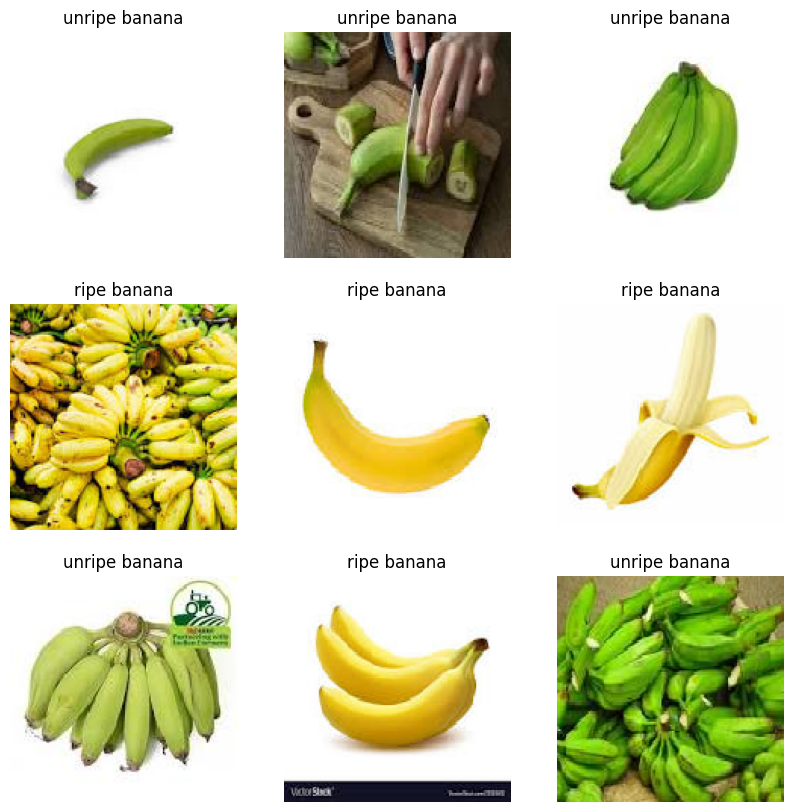

In [88]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break
plt.show()

Membuat arstektur model menggunakan metode CNN

In [89]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [90]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 128)      

Compile model

In [91]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

Melatih model

In [92]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
2/2 [==============================] - 2s 443ms/step - loss: 0.7329 - accuracy: 0.3889 - val_loss: 1.6638 - val_accuracy: 0.5294
Epoch 2/100
2/2 [==============================] - 1s 610ms/step - loss: 1.6726 - accuracy: 0.5556 - val_loss: 0.9115 - val_accuracy: 0.5294
Epoch 3/100
2/2 [==============================] - 1s 261ms/step - loss: 0.8791 - accuracy: 0.5556 - val_loss: 0.6805 - val_accuracy: 0.4706
Epoch 4/100
2/2 [==============================] - 1s 260ms/step - loss: 0.6722 - accuracy: 0.5000 - val_loss: 0.6748 - val_accuracy: 0.4706
Epoch 5/100
2/2 [==============================] - 1s 264ms/step - loss: 0.6579 - accuracy: 0.5833 - val_loss: 0.6232 - val_accuracy: 0.9412
Epoch 6/100
2/2 [==============================] - 1s 614ms/step - loss: 0.5613 - accuracy: 0.7778 - val_loss: 0.5396 - val_accuracy: 0.6765
Epoch 7/100
2/2 [==============================] - 1s 601ms/step - loss: 0.5236 - accuracy: 0.6944 - val_loss: 0.4946 - val_accuracy: 0.7353
Epoch 8/100
2

Evaluasi Model

In [93]:
model.evaluate(test_generator)

9/9 [==============================] - 1s 133ms/step - loss: 0.1591 - accuracy: 0.9460


[0.15912368893623352, 0.9460431933403015]

Perubahan metrik kinerja model (akurasi dan loss) selama pelatihan (training) dan validasi (validation)

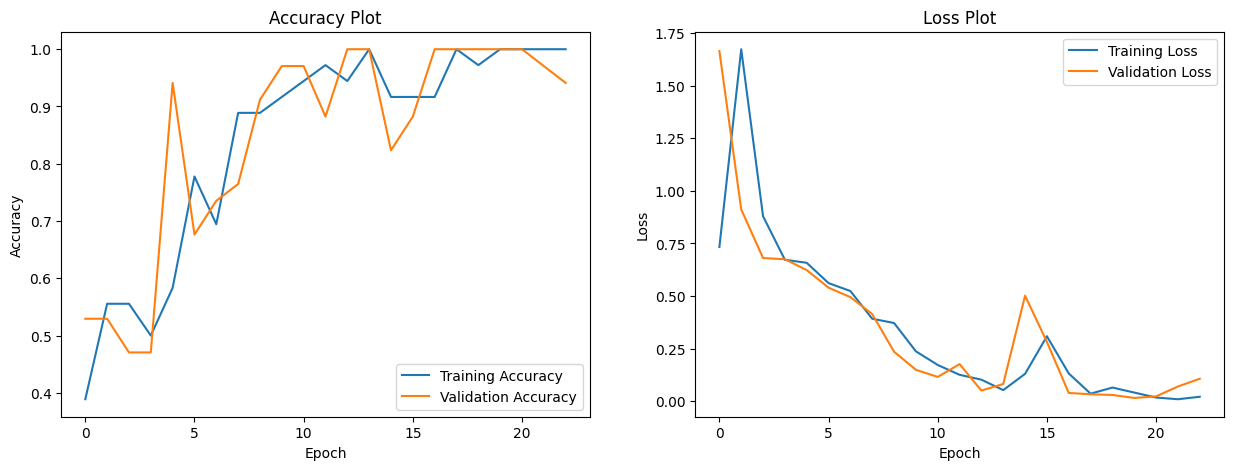

In [95]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Import library pemrosesan gambar

In [96]:
from PIL import Image
import numpy as np
from skimage import transform 

Tes model memprediksi kelas gambar yang diberikan (unripe)

In [97]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'unripe.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 75ms/step


Menampilkan hasil prediksi kelas

In [98]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred


array([['Unripe']], dtype='<U6')

Tes model memprediksi kelas gambar yang diberikan (ripe)

In [99]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'ripe.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 21ms/step


Menampilkan hasil prediksi kelas

In [100]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred


array([['Ripe']], dtype='<U6')